In [1]:
import os
import sys
import pandas as pd
from pathlib import Path
from datetime import datetime

sys.path.append(os.path.abspath(".."))

from utils.dataset.config import DatasetPath
from utils.dataset.clickstream_generator import generate_clickstream

# Dataset Path
- `recsys/data/dataset/` 하위 경로 생성

In [2]:
current_dir = os.path.abspath(os.curdir)
base_dir = "/".join(current_dir.split("/")[:-1])
dataset_dir = Path(base_dir).joinpath("data/dataset")

paths = DatasetPath(base_dir=dataset_dir, dataset_name="fashion")

# Clickstream Dataset
- 가상의 클릭 스트림 데이터 생성

In [3]:
generate_clickstream(
    user_metadata_path=paths.user_metadata_path,
    item_metadata_path=paths.item_metadata_path,
    save_path=paths.interactions_path,
    users_per_chunk=1000,
    n_sessions_per_user=5,
    actions=["click", "wishlist", "cart", "purchase"],
    action_weights=[0.8, 0.1, 0.05, 0.05],
    similarity_keys=["category", "style", "color"],
    start_date=datetime(2025, 9, 1),
    seed=42,
)

# Load Dataset

In [4]:
df = pd.read_parquet(paths.interactions_path)

In [5]:
df.shape

(161993, 14)

In [6]:
df.head()

,user_id,item_id,timestamp,action,age,gender,title,color,style,fit,material,season,sleeve,category
0,1,2194,2025-09-21 03:01:00,click,46,F,블랙 컬러의 스포티 스타일 레이온 청바지,블랙,스포티,레귤러핏,레이온,봄,롱,청바지
1,1,4723,2025-09-21 03:02:00,click,46,F,크롭핏 실루엣의 메쉬 청바지,블랙,스포티,크롭핏,메쉬,가을,롱,청바지
2,1,2689,2025-09-02 00:05:00,click,46,F,빈티지 무드의 레드 티셔츠,레드,빈티지,슬림핏,플리스,여름,롱,티셔츠
3,1,7981,2025-09-02 00:09:00,click,46,F,"겨울 시즌, 빈티지 무드의 레드 플리스 숏슬리브 크롭핏 티셔츠",레드,빈티지,크롭핏,플리스,겨울,숏슬리브,티셔츠
4,1,1770,2025-09-02 00:11:00,wishlist,46,F,필수템! 빈티지 무드의 간절기용 티셔츠,레드,빈티지,오버핏,린넨,간절기,롱슬리브,티셔츠


# EDA

## Item Frequency

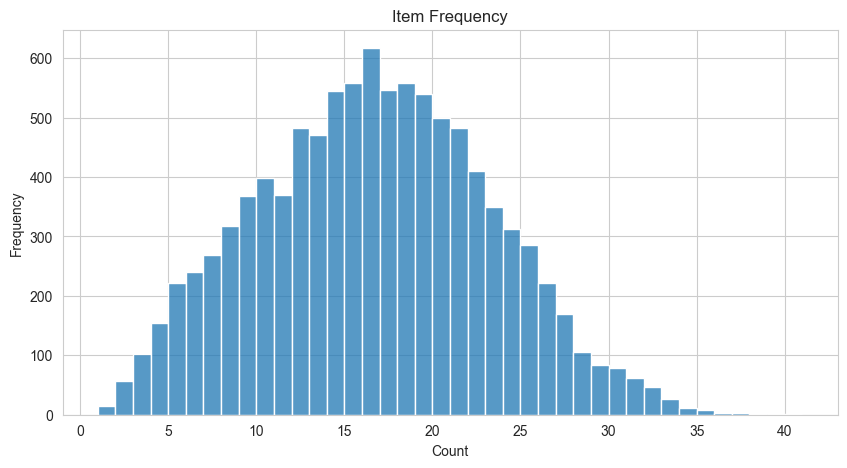

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(x=df["item_id"].value_counts(), binwidth=1)
plt.title("Item Frequency")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()